                     Language      Bytes  % of total
80                     Python  315161424   15.648195
27                    Fortran  309532751   15.368724
7                           C  297764330   14.784405
9                         C++  276736930   13.740366
90                       Ruby  229553970   11.397668
38                       HTML   99813317    4.955867
42                       Java   63112064    3.133600
97                      Shell   61005001    3.028982
106                       TeX   52562719    2.609811
67               OpenEdge ABL   36927982    1.833525
41                        IDL   32411674    1.609284
58                Mathematica   28147357    1.397555
55                   Makefile   27826550    1.381626
69                      PLSQL   23696214    1.176549
89                       Roff   22140624    1.099312
75                 PostScript   14221993    0.706141
32                       GLSL   13203264    0.655560
77                     Prolog   12072475    0.

(-1.1120600430892824,
 1.1019735196016165,
 -1.110575204285711,
 1.1005035811564625)

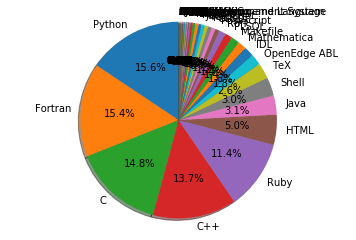

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('languages.csv')

#drop the unnecesary index column
df = df.drop(df.columns[0], axis=1)
    
#cast the Bytes column to int64
df = df[pd.to_numeric(df.Bytes,errors='coerce').notnull()]
df.Bytes = df['Bytes'].astype(str).astype(int)
df.sort_values(by='Bytes', ascending=False)

#group the rows by languages and sum on the Bytes column
lang = df.groupby('Language', as_index=False)['Bytes'].sum()

#filter out largest one --
# SED files are used in one repository as observation data,
# not as the actual sed language
lang = lang[lang['Language'] != "sed"] #hmm - not sure why sed takes up such a large %
lang = lang[lang['Language'] != "Jupyter Notebook"]
#lang = lang[lang['Language'] != "TeX"]
#lang = lang[lang['Language'] != "Shell"]

#create a new column for the percent that language occupies
lang['% of total'] = lang.Bytes / lang.Bytes.sum() * 100

#filtering out irrelevant data
lang = lang[lang['% of total'] > 0.001]

lang = lang.sort_values(by='% of total', ascending=False)

print(lang)

#Pie chart time!
fig1, ax1 = plt.subplots()
ax1.pie(lang[lang.columns[1]], labels=lang[lang.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

Questions:

1. Why is sed so big
2. How many files are the bytes spread across (will require more work on the csv)

                                  Language      Bytes  % of total
0                                   Python  315161424   15.648195
1                                  Fortran  309532751   15.368724
2  All other languages, each < 2% of total  308595680   15.322197
3                                        C  297764330   14.784405
4                                      C++  276736930   13.740366
5                                     Ruby  229553970   11.397668
6                                     HTML   99813317    4.955867
7                                     Java   63112064    3.133600
8                                    Shell   61005001    3.028982
9                                      TeX   52562719    2.609811


(-1.1120399312891442,
 1.1015514259751142,
 -1.109602190297354,
 1.1004572508438013)

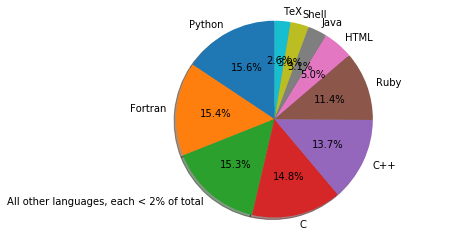

In [86]:
#Now, create a pie chart with languages <2% consolidated into one "Other Languages" entry

#calculate percent sum
#calculate bytes sum
#filter lang dataframe for > 2%
#create new dataframe row of sum data and append to filtered dataframe

find_sum = lang[lang['% of total'] < 2].sum()

pct_sum = find_sum['% of total']
bytes_sum = find_sum['Bytes']

new_row = ["All other languages, each < 2% of total",
          bytes_sum,
          pct_sum]

most = lang[lang['% of total'] >= 2].reset_index().drop(columns=['index'])
most.loc[len(most)] = new_row
most = most.sort_values(by='% of total', ascending=False).reset_index().drop(columns=['index'])
print(most)


fig2, ax2 = plt.subplots()
ax2.pie(most[most.columns[1]], labels=most[most.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')